In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import sklearn as sk
import os
from IPython.display import clear_output, display
from sklearn import svm, datasets

In [4]:
! pip install -q kaggle
from google.colab import files
files.upload()

{}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/date-fruit-datasets                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           2148        351  0.9375           
datasets/piterfm/2022-ukraine-russian-war                      2022 Ukraine Russia War                            2KB  2022-04-22 09:03:42          10718        587  1.0              
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            252        303  0.9375           
datasets/kamilpytlak/personal-key-indicators-of-heart-disease  Personal Key Indi

In [7]:
# if not os.path.exists('heart-disease-uci.zip'):
!kaggle datasets download -d vikrishnan/iris-dataset

iris-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
name = ['sepal_len', 'sepal_wid','petal_len','petal_wid','class']
df = pd.read_csv('iris-dataset.zip',compression='zip',header=None, names=name)

In [9]:
df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## SVM

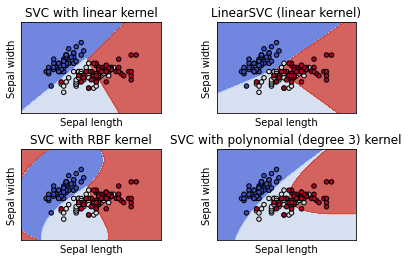

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# df

# Take the first two features. We could avoid this by using a two-dim dataset
X = df.iloc[:, [0,1]]
X = X.to_numpy()
# print(X)

arr =  ['Iris-setosa','Iris-versicolor','Iris-virginica',]
y = df.iloc[:, [4]].to_numpy().squeeze()
# 與老師的sample code一樣class分別為
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2
y = y.astype("int64") # 轉型態

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


plt.show()

## KNN

In [142]:
# 參考連結:https://ithelp.ithome.com.tw/articles/10197110
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

name = ['sepal_len', 'sepal_wid','petal_len','petal_wid','class']
df = pd.read_csv('iris-dataset.zip',compression='zip',header=None, names=name)

train, test  = train_test_split(df,test_size=0.2) #
# train, valid = train_test_split(train,test_size=0.1)

train_x = train.copy()
train_y = train_x.pop('class')
# valid_x = valid.copy()
# valid_y = valid_x.pop('class')
test_x  = test.copy()
test_y  = test_x.pop('class')

pd.concat([train_x,train_y],axis=1).head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica
59,5.2,2.7,3.9,1.4,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa


In [176]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [177]:
print(knn.predict(test_x))
print(test_y.to_numpy())

correct = knn.score(test_x,test_y)
print(correct)
# correct = 0
# for i in range(len(test_y)):
#   if(knn.predict(test_x)[i] == test_y[i]):
#     correct = correct + 1

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
0.9666666

## Decision Tree

In [178]:
# 參考: 老師sample code
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_x,train_y)
dt_acc = dt_clf.score(test_x,test_y)
print(dt_acc)

0.9333333333333333


## Logistic Regression

In [181]:
# 參考連結: https://ithelp.ithome.com.tw/articles/10187047
from sklearn import preprocessing, linear_model

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(train_x,train_y)

# print(model.predict(test_x))
# print(test_y)

correct = model.score(test_x,test_y)
print(correct)

0.9666666666666667


## non-linear SVM

In [182]:
# 參考: 老師sample code
C = 1.0
model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
model.fit(train_x,train_y)

# print(model.predict(test_x))
# print(test_y)

correct = model.score(test_x,test_y)
print("poly kernel:" + str(correct))

model2 = svm.SVC(kernel="rbf", gamma=0.7, C=C)
model2.fit(train_x,train_y)

# print(model.predict(test_x))
# print(test_y)

correct = model2.score(test_x,test_y)
print("rbf kernel:" + str(correct))


poly kernel:1.0
rbf kernel:0.9666666666666667


## Perceptron

In [148]:
# 參考連結: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(train_x, train_y)

correct = p.score(test_x,test_y)
print(correct)

0.9


## ddd

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time

name = ['sepal_len', 'sepal_wid','petal_len','petal_wid','class']
df = pd.read_csv('iris-dataset.zip',compression='zip',header=None, names=name)

correct = [0,0,0,0,0,0]
sum_of_time = [0,0,0,0,0,0]

TEST_CASE_NUM = 1000

for case in range(TEST_CASE_NUM):
  # 切割訓練資料
  train, test  = train_test_split(df,test_size=0.2) #
  # train, valid = train_test_split(train,test_size=0.1)
  train_x = train.copy()
  train_y = train_x.pop('class')
  # valid_x = valid.copy()
  # valid_y = valid_x.pop('class')
  test_x  = test.copy()
  test_y  = test_x.pop('class')
  # pd.concat([train_x,train_y],axis=1).head()

  # knn
  start = time.time()
  knn = KNeighborsClassifier()
  knn.fit(train_x,train_y)
  correct[0] += knn.score(test_x,test_y)
  sum_of_time[0] += time.time() - start

  # Decision tree
  start = time.time()
  dt_clf = DecisionTreeClassifier()
  dt_clf.fit(train_x,train_y)
  correct[1] += dt_clf.score(test_x,test_y)
  sum_of_time[1] += time.time() - start
  
  # Logistic Regression
  start = time.time()
  model=linear_model.LogisticRegression(max_iter=1000)
  model.fit(train_x,train_y)
  correct[2] += model.score(test_x,test_y)
  sum_of_time[2] += time.time() - start

  # non-linear SVM of poly kernel
  start = time.time()
  C = 1.0
  model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
  model.fit(train_x,train_y)
  correct[3] += model.score(test_x,test_y)
  sum_of_time[3] += time.time() - start

  # non-linear SVM of rbf kernel
  start = time.time()
  model2 = svm.SVC(kernel="rbf", gamma=0.7, C=C)
  model2.fit(train_x,train_y)
  correct[4] += model2.score(test_x,test_y)
  sum_of_time[4] += time.time() - start

  # Perceptron
  start = time.time()
  p = Perceptron()
  p.fit(train_x, train_y)
  correct[5] += p.score(test_x,test_y)
  sum_of_time[5] += time.time() - start

print("Correct rate average in " + str(TEST_CASE_NUM) + " times testing.")
for case in range(correct.__len__()):
  correct[case] = correct[case] / TEST_CASE_NUM
  sum_of_time[case] = sum_of_time[case] / TEST_CASE_NUM * 1000 # ms
  if case == 0:
    print("knn:")
  elif case == 1:
    print("Decision tree:")
  elif case == 2:
    print("Logistic Regression:")
  elif case == 3:
    print("non-linear SVM of poly kernel:")
  elif case == 4:
    print("non-linear SVM of rbf kernel:")
  elif case == 5:
    print("Perceptron:")
  print("Correct rate:" + str(correct[case]))
  print("Average time:" + str(sum_of_time[case]) + "\n")

print("Correct:")
str_arr = ["knn","decision tree", "logistic regression","poly SVM","rbf SVM", "perceptron"]
for i in range(0,correct.__len__()):
  min = i
  for j in range(i,correct.__len__()):
    if (correct[min] > correct[j]):
      min = j
  temp = correct[min]
  correct[min] = correct[i]
  correct[i] = temp
  
  temp2 = str_arr[min]
  str_arr[min] = str_arr[i]
  str_arr[i] = temp2
  
for i in range(0,correct.__len__()):
  print(str(i+1) + ": " + str_arr[i] + " is ", end=" ")
  print(correct[i])

print("Time:")
str_arr = ["knn","decision tree", "logistic regression","poly SVM","rbf SVM", "perceptron"]
for i in range(0,correct.__len__()):
  min = i
  for j in range(i,correct.__len__()):
    if (sum_of_time[min] > sum_of_time[j]):
      min = j
  temp = sum_of_time[min]
  sum_of_time[min] = sum_of_time[i]
  sum_of_time[i] = temp
  
  temp2 = str_arr[min]
  str_arr[min] = str_arr[i]
  str_arr[i] = temp2
  
for i in range(0,correct.__len__()):
  print(str(i+1) + ": " + str_arr[i] + " is ", end=" ")
  print(sum_of_time[i])

Correct rate average in 1000 times testing.
knn:
Correct rate:0.9629999999999972
Average time:5.068420886993408

Decision tree:
Correct rate:0.945433333333326
Average time:3.284367322921753

Logistic Regression:
Correct rate:0.9626333333333311
Average time:31.64527297019958

non-linear SVM of poly kernel:
Correct rate:0.9644666666666635
Average time:4.3868408203125

non-linear SVM of rbf kernel:
Correct rate:0.9667666666666634
Average time:3.6568384170532227

Perceptron:
Correct rate:0.7326666666666659
Average time:5.248227119445801

Correct:
1: perceptron is  0.7326666666666659
2: decision tree is  0.945433333333326
3: logistic regression is  0.9626333333333311
4: knn is  0.9629999999999972
5: poly SVM is  0.9644666666666635
6: rbf SVM is  0.9667666666666634
Time:
1: decision tree is  3.284367322921753
2: rbf SVM is  3.6568384170532227
3: poly SVM is  4.3868408203125
4: knn is  5.068420886993408
5: perceptron is  5.248227119445801
6: logistic regression is  31.64527297019958



# Plot different SVM classifiers in the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with different kernels.

The linear models ``LinearSVC()`` and ``SVC(kernel='linear')`` yield slightly
different decision boundaries. This can be a consequence of the following
differences:

- ``LinearSVC`` minimizes the squared hinge loss while ``SVC`` minimizes the
  regular hinge loss.

- ``LinearSVC`` uses the One-vs-All (also known as One-vs-Rest) multiclass
  reduction while ``SVC`` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes)
while the non-linear kernel models (polynomial or Gaussian RBF) have more
flexible non-linear decision boundaries with shapes that depend on the kind of
kernel and its parameters.

.. NOTE:: while plotting the decision function of classifiers for toy 2D
   datasets can help get an intuitive understanding of their respective
   expressive power, be aware that those intuitions don't always generalize to
   more realistic high-dimensional problems.


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

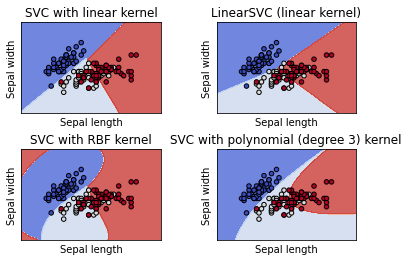

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
print(X)
print(type(y[0]))

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()